In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

c:\users\jdavies\anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
def lineout(data, start, stop):
    length=np.sqrt((stop[0]-start[0])**2+(stop[1]-start[1])**2)
    xs, ys=np.linspace(start[0], stop[0], length), np.linspace(start[1], stop[1], length)
    lineout = data[xs.astype(np.int), ys.astype(np.int)]
    return lineout

In [3]:
cd "\\linna\Users\Magpie\Documents\MAGPIE data\2015\Oct_15\s1008_15 Reconnection Al TS outflow"

\\linna\Users\Magpie\Documents\MAGPIE data\2015\Oct_15\s1008_15 Reconnection Al TS outflow


In [4]:
plas = misc.imread('s1008_15 End on 532nm Interferometry t211ns.JPG')
plas =np.sum(plas,2)
vac = misc.imread('s1008_15 End on 532nm Interferometry (1).JPG')
vac =np.sum(vac,2)

<IPython.core.display.Javascript object>


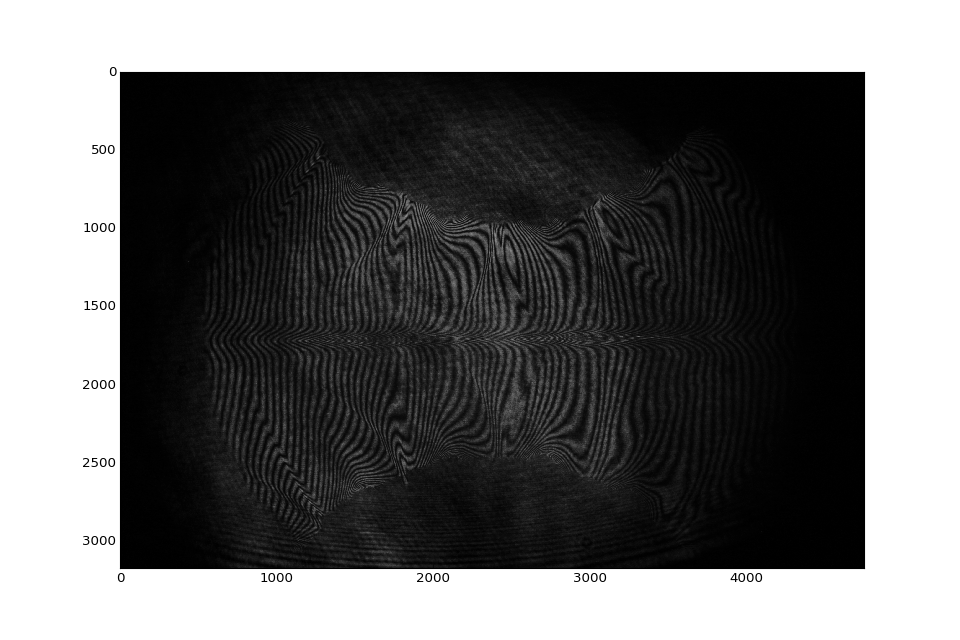

In [5]:
fig, ax=plt.subplots(figsize=(12,8))
im=ax.imshow(plas, cmap='Greys_r', interpolation='none')

In [66]:
f2=(1612,1716)
f4=(1656,1840)
f7=(1756,2068)
f10=(1852,2304)
f12=(1904,2428)

coords=np.array([[2, 1612,1716],[4,1656,1840],[7,1756,2068],[10,1852,2304],[12,1904,2428]])

(1929, 2499)


c:\users\jdavies\anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


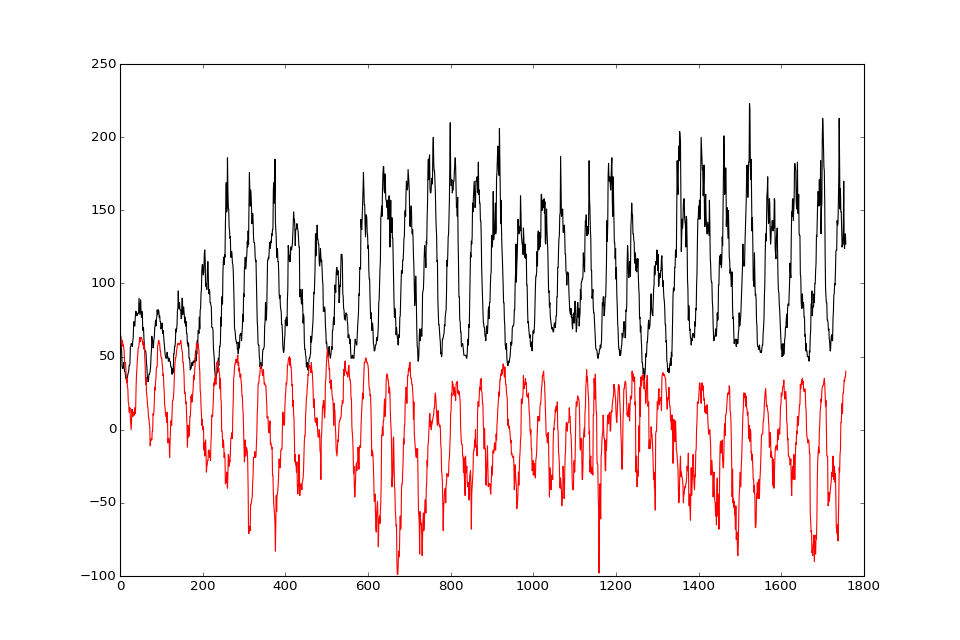

In [115]:
f=13
start_h=(1986,966)
start_l=(1200,900)
stop=(int(29.2*f+1550),int(71.2*f+1574))
print(stop)

lov=lineout(vac, start_l, stop)
lop=lineout(plas, start_l, stop)
fig, ax=plt.subplots(figsize=(12,8))
ax.plot((lov-lov.mean())+100, color='black')
ax.plot(-(lop-lop.mean()), color='red')

In [116]:
One_Fringe=4.2e17
Fringe_vac=32.75
Fringe_plas=37
(Fringe_plas-Fringe_vac)*One_Fringe

1.785e+18

In [42]:
def peak_count(array):
    m=array.mean()
    high=0
    low=0
    switch=False
    peak=0
    aindices=[]
    for ain, a in enumerate(array):
        if a>m*1.2 and switch is False:
            peak=peak+1
            switch=True
            aindices.append(ain)
        if a<m*0.8:
            switch=False
    return peak, aindices

In [35]:
for a, ain in enumerate(lop):
    a, ain